### Vaishnav Krishna P
- vyshnavkrishnap2020@gmail.com

### Load Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize


### Load image

In [ ]:
img_path = '/content/TC001_39.png'
img = cv2.imread(img_path)

### Orginal Image

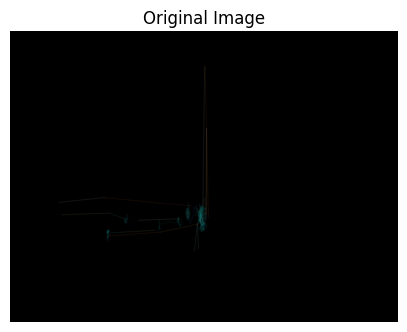

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

### Convert to Grayscale

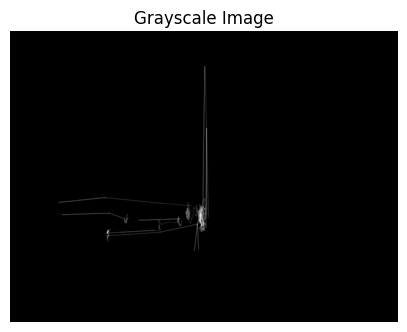

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


### Threshold / Background Removal

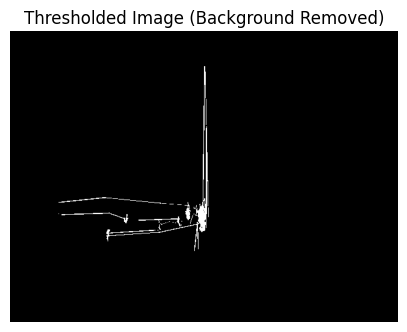

In [ ]:
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(5,5))
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image (Background Removed)")
plt.axis('off')
plt.show()

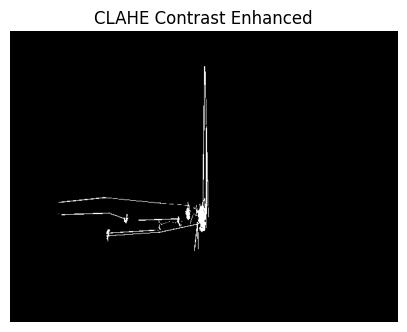

In [ ]:
# --------------------------
# 3️⃣ Contrast Enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(thresh)
plt.figure(figsize=(5,5))
plt.imshow(enhanced, cmap='gray')
plt.title("CLAHE Contrast Enhanced")
plt.axis('off')
plt.show()

### Edge Detection (Canny)

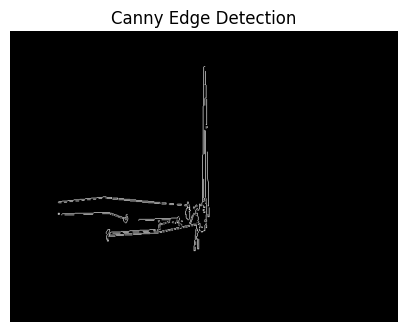

In [ ]:
edges = cv2.Canny(enhanced, 50, 150)
plt.figure(figsize=(5,5))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

### Morphological Dilation (Connect Broken Lines)

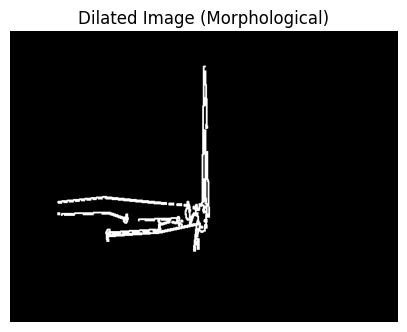

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilated = cv2.dilate(edges, kernel, iterations=1)
plt.figure(figsize=(5,5))
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image (Morphological)")
plt.axis('off')
plt.show()

### Skeletonization (Thin Lines)

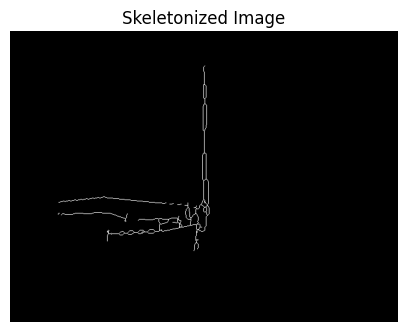

In [ ]:
dilated_bool = dilated > 0
skeleton = skeletonize(dilated_bool)
plt.figure(figsize=(5,5))
plt.imshow(skeleton, cmap='gray')
plt.title("Skeletonized Image")
plt.axis('off')
plt.show()

### Resize & Normalize for CNN Input

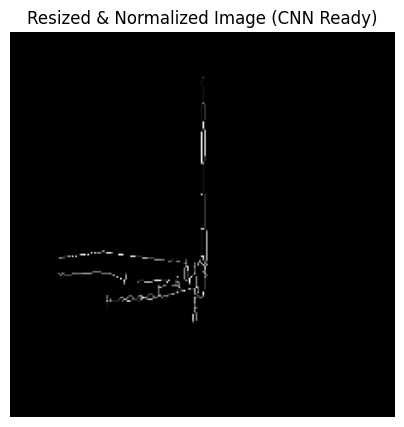

In [ ]:
resized = cv2.resize(skeleton.astype(np.float32), (224,224))
normalized = resized / np.max(resized)

plt.figure(figsize=(5,5))
plt.imshow(normalized, cmap='gray')
plt.title("Resized & Normalized Image (CNN Ready)")
plt.axis('off')
plt.show()